In [2]:
#import required libs 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")
aisles=pd.read_csv("aisles.csv")
departments=pd.read_csv("departments.csv")
order_products_prior=pd.read_csv("order_products__prior.csv")
# quick overview of all the orders
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
products=pd.merge(aisles, products, on='aisle_id')
products.head()

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20


In [5]:
products=pd.merge(departments, products, on="department_id")
products.head()

,department_id,department,aisle_id,aisle,product_id,product_name
0,1,frozen,34,frozen meat seafood,118,Ground Turkey Chub
1,1,frozen,34,frozen meat seafood,383,Breaded Chicken Breast Tenders
2,1,frozen,34,frozen meat seafood,402,100% Pure Beef Homestyle Patties
3,1,frozen,34,frozen meat seafood,625,"Chicken Breast Nuggets, Dinosaur Shaped"
4,1,frozen,34,frozen meat seafood,831,All Natural Premium Cornish Hen


In [6]:
products=pd.merge(order_products_prior, products, on="product_id")
products.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,2,33120.0,1.0,1.0,16,dairy eggs,86,eggs,Organic Egg Whites
1,26,33120.0,5.0,0.0,16,dairy eggs,86,eggs,Organic Egg Whites
2,120,33120.0,13.0,0.0,16,dairy eggs,86,eggs,Organic Egg Whites
3,327,33120.0,5.0,1.0,16,dairy eggs,86,eggs,Organic Egg Whites
4,390,33120.0,28.0,1.0,16,dairy eggs,86,eggs,Organic Egg Whites


In [7]:
#order per customer 
orders_per_customer=orders.groupby("user_id")["order_number"].max().reset_index()
orders_per_customer.head()

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Customer')

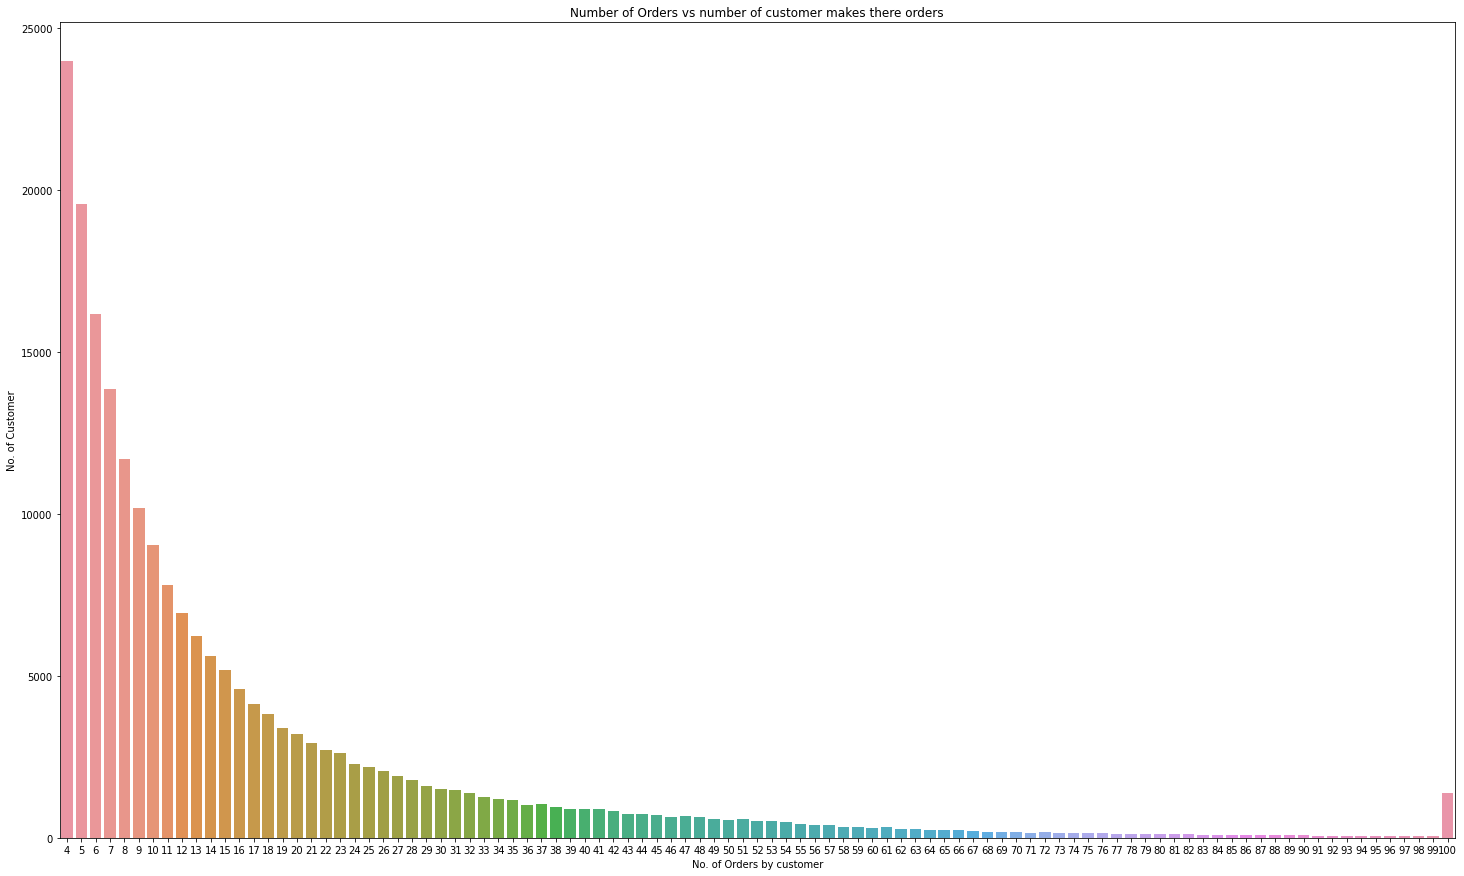

In [8]:
plt.figure(figsize=(25,15))
sns.countplot(orders_per_customer["order_number"])
plt.title("Number of Orders vs number of customer makes there orders")
plt.xlabel("No. of Orders by customer")
plt.ylabel("No. of Customer")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

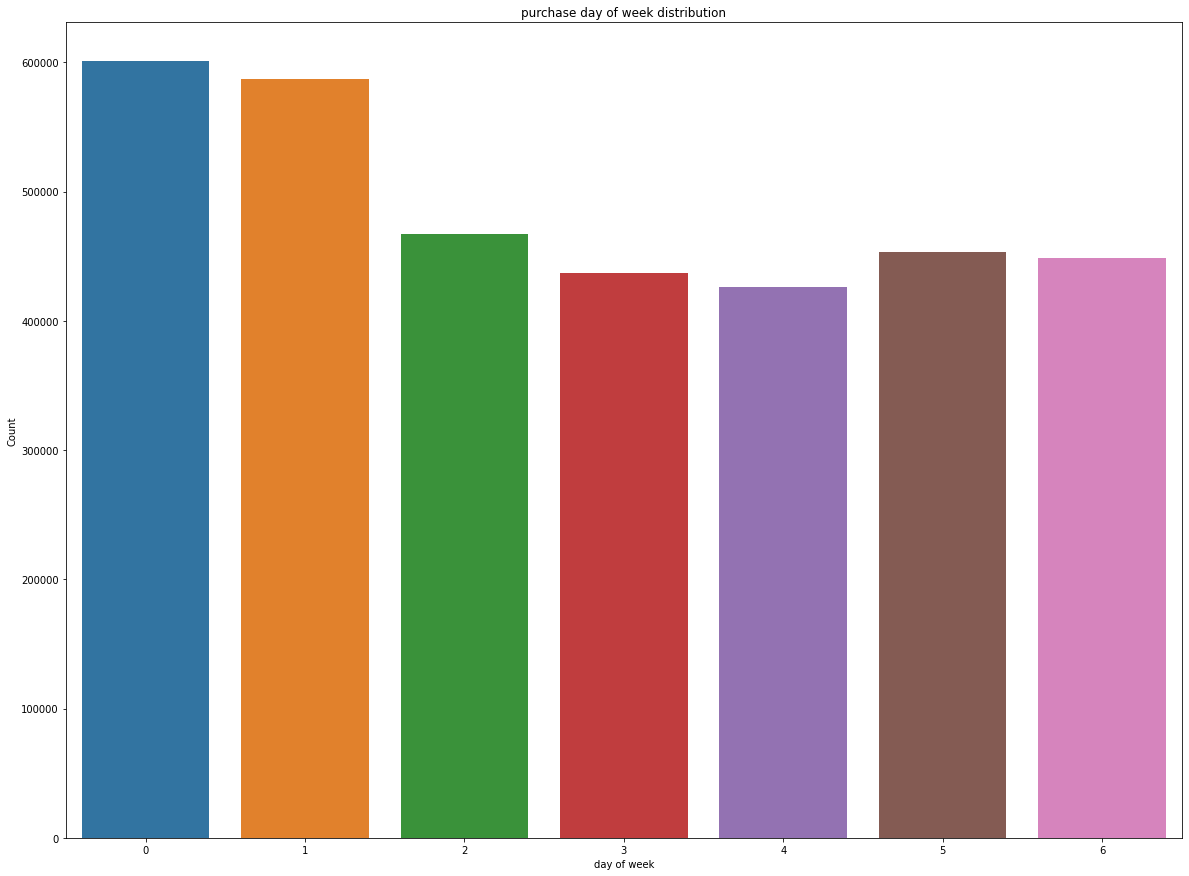

In [9]:
orders_dow=orders["order_dow"].value_counts()
plt.figure(figsize=(20,15))
sns.countplot(orders["order_dow"])
plt.title("purchase day of week distribution")
plt.xlabel("day of week")
plt.ylabel("Count")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

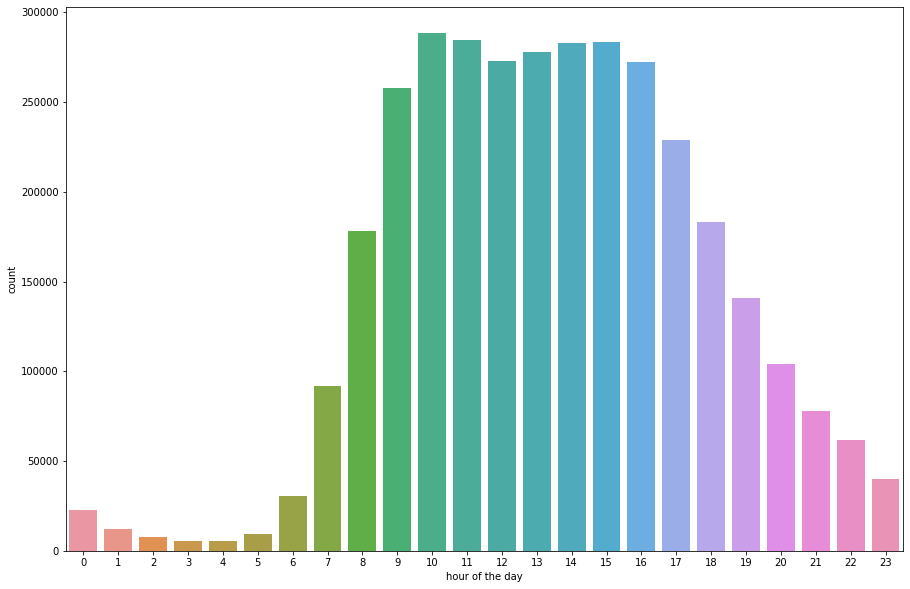

In [10]:
orders_how=orders["order_hour_of_day"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(orders["order_hour_of_day"])
plt.xlabel("hour of the day")
plt.ylabel("count")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'counts')

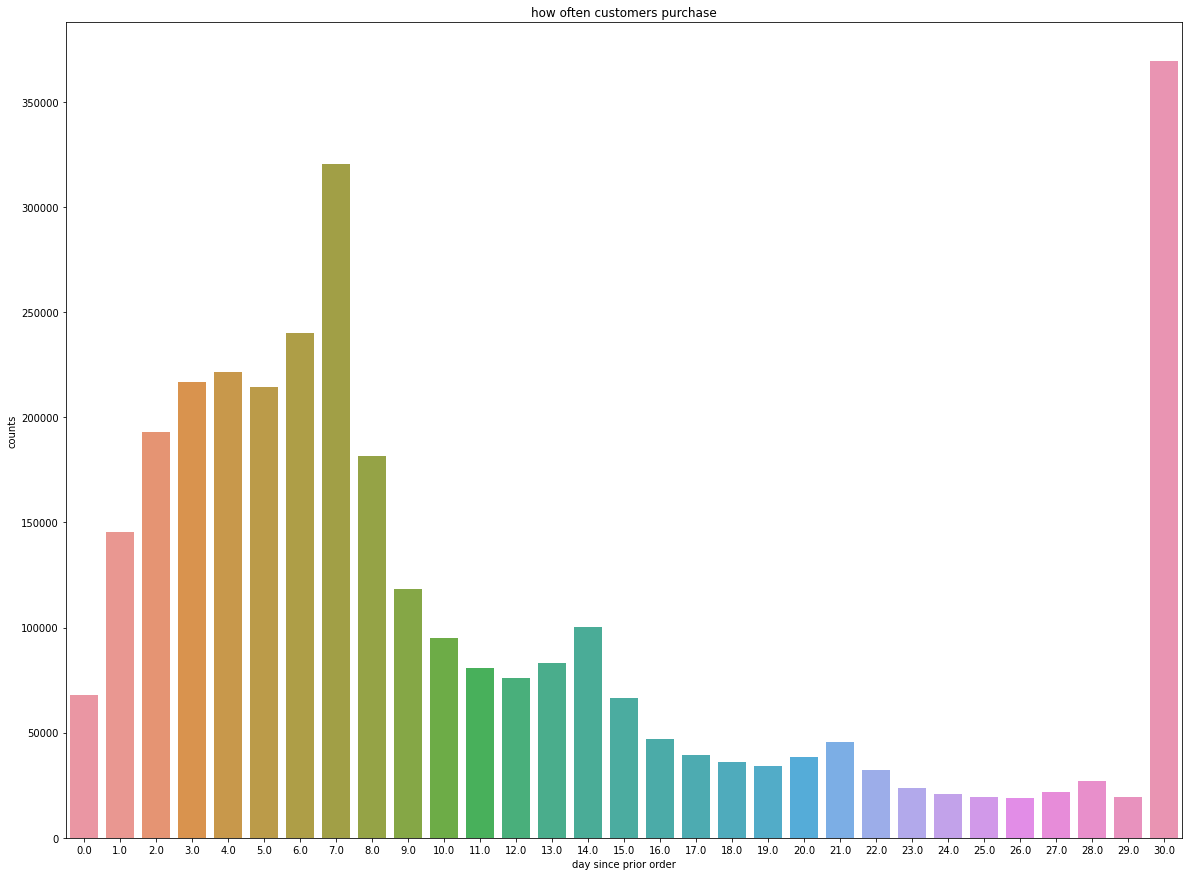

In [11]:
order_frequency=orders.groupby("order_id")["days_since_prior_order"].max().reset_index()
plt.figure(figsize=(20,15))
sns.countplot(order_frequency["days_since_prior_order"])
plt.title("how often customers purchase")
plt.xlabel("day since prior order")
plt.ylabel("counts")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

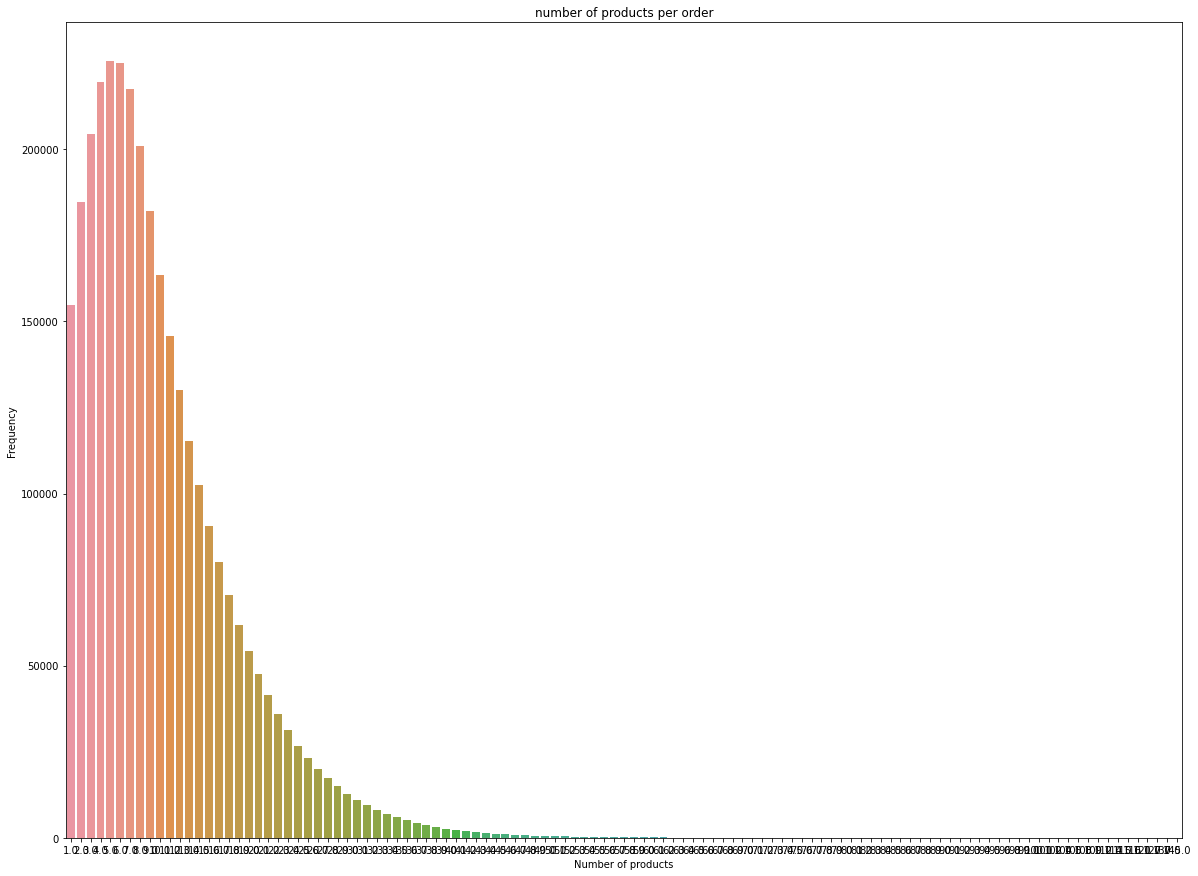

In [12]:
product_amount_per_order=products.groupby("order_id")["add_to_cart_order"].max().reset_index()
plt.figure(figsize=(20,15))
sns.countplot(product_amount_per_order["add_to_cart_order"])
plt.title("number of products per order")
plt.xlabel("Number of products")
plt.ylabel("Frequency")

Text(0, 0.5, 'count')

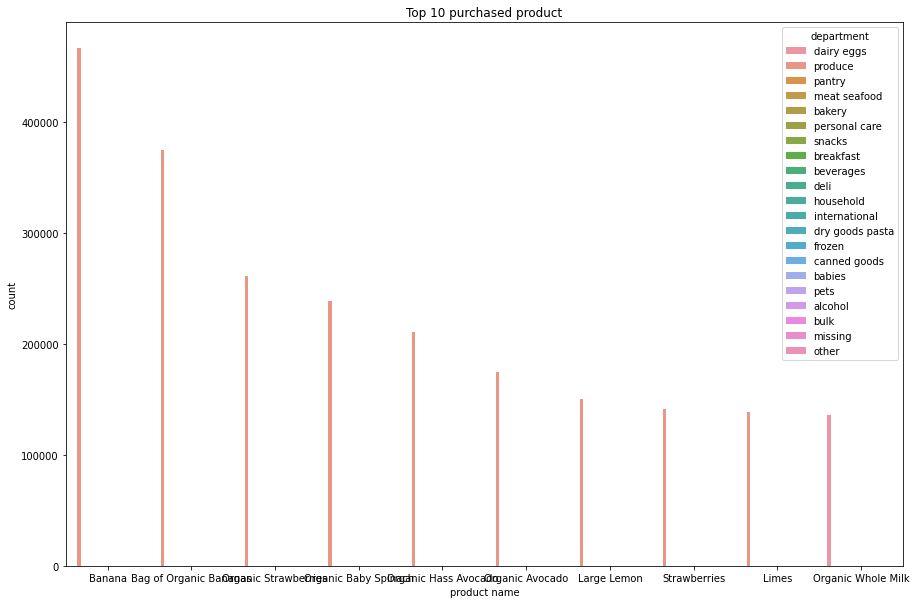

In [13]:
top_ten_products=products["product_name"].value_counts().head(10)
plt.figure(figsize=(15,10))
sns.countplot(x="product_name", hue="department", data=products, order=products.product_name.value_counts().iloc[:10].index)
plt.title("Top 10 purchased product")
plt.xlabel("product name")
plt.ylabel("count")

,product_id,product_name,reordered
24847,24852.0,Banana,466838
13172,13176.0,Bag of Organic Bananas,374829
21133,21137.0,Organic Strawberries,261514
21899,21903.0,Organic Baby Spinach,238968
47196,47209.0,Organic Hass Avocado,210948
47753,47766.0,Organic Avocado,174676
47613,47626.0,Large Lemon,150820
16793,16797.0,Strawberries,141260
26203,26209.0,Limes,138882
27838,27845.0,Organic Whole Milk,136207


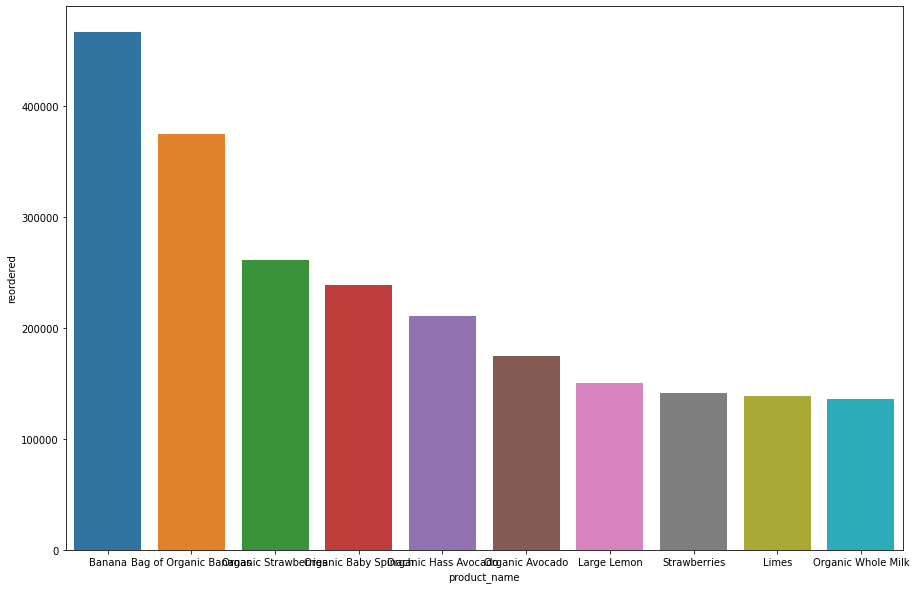

In [14]:
product_reorders=products.groupby(["product_id", "product_name"])['reordered'].count().reset_index()
product_reorders_top_ten=product_reorders.nlargest(10,"reordered")
plt.figure(figsize=(15,10))
sns.barplot(x="product_name", y="reordered", data=product_reorders_top_ten)
product_reorders_top_ten

This is Cluster analysis of instacart data analysis 

In [18]:
products.head()

cust_prod = pd.crosstab(orders['user_id'], products['aisle'])

cust_prod.head()

aisle,air fresheners candles,asian foods,baby food formula,baking ingredients,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,buns rolls,...,salad dressing toppings,soft drinks,soup broth bouillon,soy lactosefree,spices seasonings,spirits,spreads,trail mix snack mix,water seltzer sparkling water,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples=pca.transform(cust_prod)
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-7.148720,-1.240285,-3.245627,-1.439630,-0.179544,-0.380732
1,-7.162264,-1.247830,-3.269687,-1.460883,-0.185694,-0.394011
2,-7.155492,-1.244057,-3.257657,-1.450257,-0.182619,-0.387372
3,-7.131790,-1.230853,-3.215552,-1.413065,-0.171858,-0.364133
4,-7.128404,-1.228967,-3.209538,-1.407752,-0.170320,-0.360814


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
label = kmeans.fit_predict(cust_prod)
print (label)

[5 5 5 ... 5 5 5]


In [31]:
label_0 = cust_prod[label == 0]
label_1 = cust_prod[label == 1]
label_2 = cust_prod[label == 2]
label_3 = cust_prod[label == 3]
label_4 = cust_prod[label == 4]
label_5 = cust_prod[label == 5]


In [39]:
import matplotlib.pyplot as plt

filtered_label0 = cust_prod[label == 0]
'''cols0 = filtered_label0.columns
filtered_label1 = cust_prod[label == 1]
cols1 = filtered_label1.columns
filtered_label2 = cust_prod[label == 2]
cols2 = filtered_label2.columns
filtered_label3 = cust_prod[label == 3]
cols3 = filtered_label3.columns
filtered_label4 = cust_prod[label == 4]
cols4 = filtered_label4.columns
filtered_label5 = cust_prod[label == 5]
cols5 = filtered_label5.columns

plt.scatter(label_0[cols[0]], label_0[cols0[1]], color = 'red')
plt.scatter(label_1[cols1[0]], label_1[cols1[1]], color = 'pink')
plt.scatter(label_2[cols2[0]], label_2[cols2[1]], color = 'blue')
plt.scatter(label_3[cols3[0]], label_3[cols3[1]], color = 'black')
plt.scatter(label_4[cols4[0]], label_4[cols4[1]], color = 'yellow')
plt.scatter(label_5[cols5[0]], label_5[cols4[1]], color = 'brown')'''
#plt.scatter(label_5[:,0], label_5[:,1], color = 'brown')
plt.scatter(filtered_label0[0], filtered_label0[1])
splt.show()

KeyError: ignored